In [2]:
# Основные цели и задачи проекта:  отследить влияние условий жизни учащихся на их успеваемость score,
# провести разведывательный анализ данных и составить отчёт по его результатам.

# Этапы работы над проектом: написание функций для удаления выбросов, заполнение пропусков на среднее,
# среднее значение score для каждой колонки для анализа, удаление пропусков, убедиться что нет пропусков, 
# построение pairplot с score, найти закономерности.
# Пропуски числовых переменных можно заменить на медианные значения, 
# не числовые - удалить или оставить(если менять на моду будет сильное искажение там где всего 2 уникальных значения).
# Выводы: 
# Данные хорошего качества, можно ралботать даже с пропусками.
# Судя по средним значениям score для не числовых значений, успеваемость лучше если:
#     опекун мать или отец (не другие), проживание в городе, без дополнительной образовательной поддержки, 
#  если хочет получить высшее образование, есть интернет, не состоит в романтических отношениях.
# Очень сильно влияют 3 показателя - higher — хочет получить высшее образование, romantic — в романтических отношениях и
#  internet — наличие интернета дома
# Те ученики которые не хотят получать высшее, находятся в романтических отношениях, без интернета - в зоне риска.
# Остальные не числовые показатели не влияют на успеваемость.

# Судя по графику pairplot для score для числовых значений, успеваемость лучше если:
#     меньше пропущеных занятий,  меньше количество внеучебных неудач, меньше время в пути до школы,
Остальные  числовые показатели влияют на успеваемость в незначительной степени.
    




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [3]:
print(stud.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')


In [4]:
#удаление выбросов
def no_outlier(stud):
    IQR = stud.quantile(0.75) - stud.quantile(0.25)
    perc25 = stud.quantile(0.25)
    perc75 = stud.quantile(0.75)
    stud = stud.loc[stud.between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]
    return stud

stud.score = no_outlier(stud.score)
stud.Fedu = no_outlier(stud.Fedu)
stud.age = no_outlier(stud.age)
stud.absences = no_outlier(stud.absences)
stud.health = no_outlier(stud.health)

In [5]:
#заполнение пропусков на среднее
def nan_numeric (col): 
    avg_val = stud[col].median()
    stud[col].fillna(avg_val, inplace=True)

#print(stud.isna().sum()) # количество пропусков
for name in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular',
             'famrel', 'freetime', 'goout', 'health', 'absences']:
    nan_numeric(name)

In [6]:
#удаление пропусков

for col in ['sex', 'guardian', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
             'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    stud = stud[stud[col].notna()]

In [7]:
#среднее значение score для каждой колонки
def avg_score (col):
    avg_val = []
    avg_val = stud.groupby(col)['score'].mean()
    return avg_val

for name in ['sex', 'guardian', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
             'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    print(avg_score(name))

sex
F    48.866667
M    58.620690
Name: score, dtype: float64
guardian
father    55.535714
mother    52.819149
other     49.545455
Name: score, dtype: float64
address
R    42.812500
U    56.386139
Name: score, dtype: float64
famsize
GT3    52.032967
LE3    55.476190
Name: score, dtype: float64
Pstatus
A    55.312500
T    52.820513
Name: score, dtype: float64
Mjob
at_home     45.714286
health      53.181818
other       52.604167
services    57.432432
teacher     54.375000
Name: score, dtype: float64
Fjob
at_home     51.666667
health      53.500000
other       52.313433
services    53.648649
teacher     56.153846
Name: score, dtype: float64
reason
course        50.625000
home          51.142857
other         59.545455
reputation    56.153846
Name: score, dtype: float64
guardian
father    55.535714
mother    52.819149
other     49.545455
Name: score, dtype: float64
schoolsup
no     54.521739
yes    44.166667
Name: score, dtype: float64
famsup
no     54.166667
yes    52.529412
Name: score,

In [8]:
stud.insert(loc=0, column='test', value=0) #первая пустая сторока

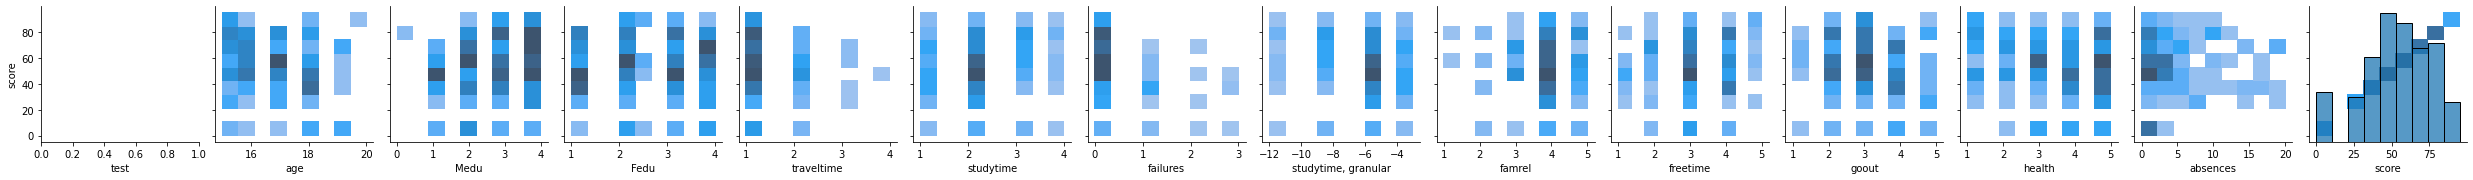

In [9]:
sns.pairplot(stud, kind="hist", y_vars=["score"])